# Module 12: TableOne Package in Python

Before the introduction of the TableOne package, creating descriptive statistics tables, commonly known as "Table 1" in medical research, was a cumbersome and error-prone task.

Researchers and analysts often had to manually calculate and format the statistics for each variable in their datasets, a process that was not only time-consuming but also vulnerable to inconsistencies and mistakes. This manual approach required extensive use of spreadsheets or custom scripts, which lacked standardization and reproducibility.

Additionally, handling stratified analyses and missing data further complicated the process, making it difficult to produce accurate and publication-ready tables efficiently.




## How does TableOne Help to Remedy These Problems?

The TableOne package aims to address the challenges of creating descriptive statistics tables by providing a streamlined, standardized, and reproducible solution.

By automating the calculation and formatting of descriptive statistics for both categorical and continuous variables, TableOne eliminates the need for manual computations and reduces the risk of errors.

It simplifies the process of generating "Table 1" by seamlessly integrating with Pandas DataFrames, allowing researchers to easily create tables directly from their datasets.

The package also supports stratified analyses, enabling users to generate subgroup comparisons effortlessly. Additionally, TableOne handles missing data efficiently and offers customizable output formats, ensuring that the resulting tables are publication-ready.

By offering these features, TableOne not only saves time but also enhances the accuracy and consistency of descriptive statistics tables, allowing researchers to focus more on data analysis and interpretation.

## TableOne Installation Walkthrough

Let's see how we can use TableOne in real time.

First we, start off by importing the necessary Python libraries predominantly found when working with numbers and datasets.



In [1]:
# Import numerical libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Next, let's take a look at how we can install the TableOne package in Python.

The code block begins by attempting to import the TableOne class and the `load_dataset` function from the TableOne package.

If the package is not found, indicated by a `ModuleNotFoundError` or `ImportError`, it assumes that the environment might not have TableOne installed.

In such a case, the code executes a command to install the TableOne package using pip. This installation command is tailored for environments like Google Colab, where direct shell commands can be executed from within a Python script.

After the installation process, the code retries the import statements for TableOne and `load_dataset`. This ensures that the necessary components from the TableOne package are available for subsequent use, regardless of whether they were initially installed.

In [3]:
# Import tableone
try:
    from tableone import TableOne, load_dataset
except (ModuleNotFoundError, ImportError):
    # install 
    !pip install tableone
    from tableone import TableOne, load_dataset

## Loading in Our Data

Next, we bring in a CSV file named 'demo_original.csv' from the 'sample_data' directory within Google Collab into a Pandas DataFrame called `data`.

Afterward, we display the first five rows of the DataFrame using the `head()` method to provide a quick preview of the dataset.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/EricLi35/RHC-Dataset/main/demo_original.csv')
data.head()

,Unnamed: 0,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,1,73557,8,Both interviewed and MEC examined,Male,69,NaN,Non-Hispanic Black,Non-Hispanic Black,November 1 through April 30,...,High School Grad/GED or Equivalent,Separated,NaN,13281.237386,13481.042095,1,112,"$15,000 to $19,999","$15,000 to $19,999",0.84
1,2,73558,8,Both interviewed and MEC examined,Male,54,NaN,Non-Hispanic White,Non-Hispanic White,November 1 through April 30,...,High School Grad/GED or Equivalent,Married,Less Than 9th Grade,23682.057386,24471.769625,1,108,"$35,000 to $44,999","$35,000 to $44,999",1.78
2,3,73559,8,Both interviewed and MEC examined,Male,72,NaN,Non-Hispanic White,Non-Hispanic White,May 1 through October 31,...,Some College or AA degree,Married,High School Grad/GED or Equivalent,57214.803319,57193.285376,1,109,"$65,000 to $74,999","$65,000 to $74,999",4.51
3,4,73560,8,Both interviewed and MEC examined,Male,9,NaN,Non-Hispanic White,Non-Hispanic White,November 1 through April 30,...,High School Grad/GED or Equivalent,Married,Some College or AA degree,55201.178592,55766.512438,2,109,"$55,000 to $64,999","$55,000 to $64,999",2.52
4,5,73561,8,Both interviewed and MEC examined,Female,73,NaN,Non-Hispanic White,Non-Hispanic White,November 1 through April 30,...,College Graduate or above,Married,College Graduate or above,63709.667069,65541.871229,2,116,"$100,000 and Over","$100,000 and Over",5.00


## Extracting Only the Columns that We Want

You can see that a lot of data is being outputted. As a matter of fact, there are 48 columns, which is quite a lot.

Let's shrink this amount by taking only 4 columns that we're interested in analyzing so far.

In [6]:
data = data.loc[:, ['RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMDEDUC2']]
data.head()

,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
0,Male,69,Non-Hispanic Black,High school graduate/GED or equivalent
1,Male,54,Non-Hispanic White,High school graduate/GED or equivalent
2,Male,72,Non-Hispanic White,Some college or AA degree
3,Male,9,Non-Hispanic White,NaN
4,Female,73,Non-Hispanic White,College graduate or above


## Applying the TableOne() Function

Now that we have reduced the dimensionality of our data to only 4 columns, we can begin experimenting with the `TableOne()` function.

As a refresher, the `TableOne()` method generates a comprehensive summary table of descriptive statistics for a given dataset.

This method simplifies the process of creating tables by automating the calculation and formatting statistical summary values, such as means, medians, standard deviations, and proportions.

In [7]:
TableOne(data)

Missing      Overall
n                                                                                     10175
RIAGENDR, n (%)     Female                                                      5172 (50.8)
                    Male                                                        5003 (49.2)
RIDAGEYR, mean (SD)                                                          0  31.5 (24.4)
RIDRETH3, n (%)     Mexican American                                            1730 (17.0)
                    Non-Hispanic Asian                                          1074 (10.6)
                    Non-Hispanic Black                                          2267 (22.3)
                    Non-Hispanic White                                          3674 (36.1)
                    Other Hispanic                                                960 (9.4)
                    Other Race - Including Multi-Racial                           470 (4.6)
DMDEDUC2, n (%)     9-11th grade (Includes 12th grade with no diploma)            791 (7.8)
                    College graduate or above                                   1443 (14.2)
                    Don't Know                                                      5 (0.0)
                    High school graduate/GED or equivalent                      1303 (12.8)
                    Less than 9th grade                                           455 (4.5)
                    None                                                        4406 (43.3)
                    Refused                                                         2 (0.0)
                    Some college or AA degree                                   1770 (17.4)

Let's closely examine and break down what kind of information the `TableOne()` method is telling us.

We see a summary table generated by the `TableOne` package, which provides descriptive statistics for our dataset. The table is organized into rows and columns, with each row representing a different variable or category and each column showing statistical summaries.

Key elements of the table include:

1. **n (Overall Count)**: The total number of observations in the dataset is 10,175.
2. **RIAGENDR (Gender)**: This categorical variable shows the distribution of gender in the dataset, with 5,172 females (50.8%) and 5,003 males (49.2%).
3. **RIDAGEYR (Age)**: This continuous variable presents the mean age (31.5 years) and standard deviation (24.4 years) of the participants, with no missing values.
4. **RIDRETH3 (Race/Ethnicity)**: This categorical variable details the racial and ethnic composition of the participants, with proportions such as 17.0% Mexican American, 10.6% Non-Hispanic Asian, and 36.1% Non-Hispanic White.
5. **DMDEDUC2 (Education Level)**: This categorical variable shows the highest education level attained by participants, including categories like high school graduate (12.8%), college graduate or above (14.2%), and some college or AA degree (17.4%).

The "Missing" column indicates the count of missing data for each variable, which is zero for the variables shown. The table provides a clear overview of the demographic and educational characteristics of the study population.

## Renaming Column Headers

Right now, the name of our columns isn't very useful.

Column headers such as RIAGENDR, RIDAGEYR, etc are not very descriptive, and don't give the reader an immediate idea of what kind of data the column contains.

Let's rename these columns to something a bit more appropriate and accurate.

We can do so by passing in a list of strings to `data.columns`, and this list will represent the renamed column headers in our dataframe.

In [8]:
data.columns = ["Gender", "Age", "Race", "Education"]

data.head()

,Gender,Age,Race,Education
0,Male,69,Non-Hispanic Black,High school graduate/GED or equivalent
1,Male,54,Non-Hispanic White,High school graduate/GED or equivalent
2,Male,72,Non-Hispanic White,Some college or AA degree
3,Male,9,Non-Hispanic White,None
4,Female,73,Non-Hispanic White,College graduate or above


## Running TableOne() Again

If we were to run `TableOne()` again, but this time on our data with renamed column headers, let's see what changes.

Note that I have also just assigned the `TableOne()` object to a variable called `tab_nhanes`. This variable representation will come into play later.

In [9]:
tab_nhanes = TableOne(data)

tab_nhanes

Missing      Overall
n                                                                                  10175
Gender, n (%)    Female                                                      5172 (50.8)
                 Male                                                        5003 (49.2)
Age, mean (SD)                                                            0  31.5 (24.4)
Race, n (%)      Mexican American                                            1730 (17.0)
                 Non-Hispanic Asian                                          1074 (10.6)
                 Non-Hispanic Black                                          2267 (22.3)
                 Non-Hispanic White                                          3674 (36.1)
                 Other Hispanic                                                960 (9.4)
                 Other Race - Including Multi-Racial                           470 (4.6)
Education, n (%) 9-11th grade (Includes 12th grade with no diploma)            791 (7.8)
                 College graduate or above                                   1443 (14.2)
                 Don't Know                                                      5 (0.0)
                 High school graduate/GED or equivalent                      1303 (12.8)
                 Less than 9th grade                                           455 (4.5)
                 None                                                        4406 (43.3)
                 Refused                                                         2 (0.0)
                 Some college or AA degree                                   1770 (17.4)

You can see that majority of our table remains the same, however on the very left hand side of the table, we have much more informative table names, compared to the initial table we created.

Interpreting a statistics summary table such as this one is much easier than the one we first created.

## Exporting to Different Output Formats

Tables created with the `TableOne` package can be easily exported to various file formats, such as LaTeX, CSV, and HTML. To save the table, users have two primary options.

The first option is to use the `tabulate` method to print and manually copy the table.

The second option is to call the relevant `to_<format>()` method directly on the DataFrame to save the table in the desired format.

This flexibility allows for seamless integration of the tables into different types of documents and presentations.

### The First Method

Let's start off by taking a look at the first method.

The `tableone` object features a `tabulate` method that leverages the [tabulate](https://pypi.org/project/tabulate/) package to display tables in various custom output formats.

Supported formats include "github", "html", "latex", and many more.

To export your table in LaTeX, simply use the `tabulate` method and copy the generated output onto [Overleaf.com](https://www.overleaf.com/)

In [10]:
print(tab_nhanes.tabulate(tablefmt = "latex"))

\begin{tabular}{llll}
\hline
                  &                                                    & Missing   & Overall     \\
\hline
 n                &                                                    &           & 10175       \\
 Gender, n (\%)    & Female                                             &           & 5172 (50.8) \\
                  & Male                                               &           & 5003 (49.2) \\
 Age, mean (SD)   &                                                    & 0         & 31.5 (24.4) \\
 Race, n (\%)      & Mexican American                                   &           & 1730 (17.0) \\
                  & Non-Hispanic Asian                                 &           & 1074 (10.6) \\
                  & Non-Hispanic Black                                 &           & 2267 (22.3) \\
                  & Non-Hispanic White                                 &           & 3674 (36.1) \\
                  & Other Hispanic                            

Now, we take this output and copy paste it into Overleaf.

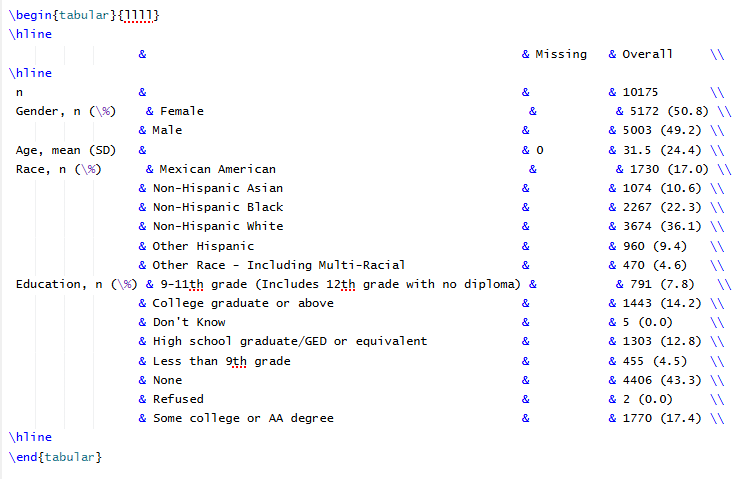


The final table looks like the following:

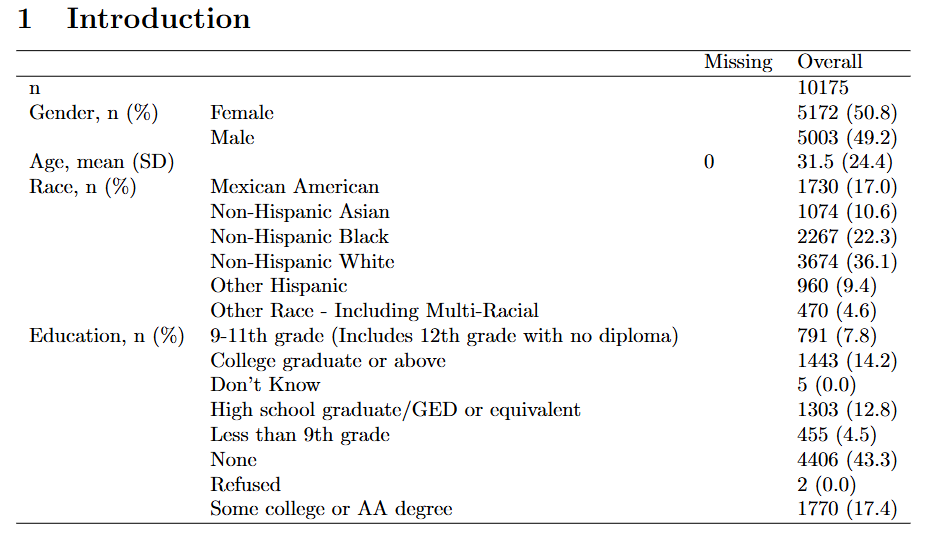

We can also save this table in Github format:

In [11]:
print(tab_nhanes.tabulate(tablefmt = "github"))

|                  |                                                    | Missing   | Overall     |
|------------------|----------------------------------------------------|-----------|-------------|
| n                |                                                    |           | 10175       |
| Gender, n (%)    | Female                                             |           | 5172 (50.8) |
|                  | Male                                               |           | 5003 (49.2) |
| Age, mean (SD)   |                                                    | 0         | 31.5 (24.4) |
| Race, n (%)      | Mexican American                                   |           | 1730 (17.0) |
|                  | Non-Hispanic Asian                                 |           | 1074 (10.6) |
|                  | Non-Hispanic Black                                 |           | 2267 (22.3) |
|                  | Non-Hispanic White                                 |           | 3674 (36.1) |


As well as HTML format:

In [12]:
print(tab_nhanes.tabulate(tablefmt = "html"))

<table>
<thead>
<tr><th>                </th><th>                                                  </th><th>Missing  </th><th>Overall    </th></tr>
</thead>
<tbody>
<tr><td>n               </td><td>                                                  </td><td>         </td><td>10175      </td></tr>
<tr><td>Gender, n (%)   </td><td>Female                                            </td><td>         </td><td>5172 (50.8)</td></tr>
<tr><td>                </td><td>Male                                              </td><td>         </td><td>5003 (49.2)</td></tr>
<tr><td>Age, mean (SD)  </td><td>                                                  </td><td>0        </td><td>31.5 (24.4)</td></tr>
<tr><td>Race, n (%)     </td><td>Mexican American                                  </td><td>         </td><td>1730 (17.0)</td></tr>
<tr><td>                </td><td>Non-Hispanic Asian                                </td><td>         </td><td>1074 (10.6)</td></tr>
<tr><td>                </td><td>Non-Hispan

### The Second Method

The second method is to call the relevant `to_format()` method from Pandas.

For example, if we wanted to save to Latex, we would use `to_latex()`. If we wanted HTML, we would use `to_html()`.

Note that if we were to use this second method, it would actually generate a file in our directory, rather than output in which we could copy-paste.


In [13]:
tab_nhanes.to_html('tab_nhanes.html')

In [14]:
tab_nhanes.to_latex('tab_nhanes.tex')

As you can see, TableOne offers plenty of flexibility when it comes to exporting tables into different formats, allowing ease of use no matter what the platform.

## Applying Stratification to TableOne()

We have seen how we can use `TableOne()` to obtain summary statistics, but what if we wanted to perform stratification on our data?

We can do so using the `groupby` argument.

To start off, it's usually good practice to sort out which variables you want to stratify by, and which variables you wish to see included in your table.

In our case, let's say we wanted to stratify by Gender. We create a variable (usually called groupby as it shares the same name as the one in the argument) and assign Gender to that variable.

For the remaining variables which will be displayed row-by-row in the table, we have to break it down into two categories: those that are categorical, and those that are continuous.

In our case, Gender, Race, and Education are the categorical variables, which we save in the form as a list.

Age is our one and only continuous variable.

It should be noted that in our initial table, we did not go through this sorting process, as TableOne automatically detects for categorical variables.

However, for consistency's sake, it is considered good practice to explicitly define your categorical and numerical variables. This is especially important if your dataset has many columns, with the potential of certain column types being more ambiguous.   



In [15]:
columns = ["Gender", "Age", "Race", "Education"]

groupby = "Gender"

categorical = ["Gender", "Race", "Education"]

continuous = ["Age"]



TableOne(data, columns=columns, categorical=categorical, continuous=continuous, groupby=groupby)

Grouped by Gender                                         
                                                                              Missing      Overall        Female          Male
n                                                                                            10175          5172          5003
Gender, n (%)    Female                                                                5172 (50.8)  5172 (100.0)              
                 Male                                                                  5003 (49.2)                5003 (100.0)
Age, mean (SD)                                                                      0  31.5 (24.4)   32.3 (24.4)   30.7 (24.4)
Race, n (%)      Mexican American                                                      1730 (17.0)    897 (17.3)    833 (16.7)
                 Non-Hispanic Asian                                                    1074 (10.6)    553 (10.7)    521 (10.4)
                 Non-Hispanic Black                                                    2267 (22.3)   1115 (21.6)   1152 (23.0)
                 Non-Hispanic White                                                    3674 (36.1)   1863 (36.0)   1811 (36.2)
                 Other Hispanic                                                          960 (9.4)     511 (9.9)     449 (9.0)
                 Other Race - Including Multi-Racial                                     470 (4.6)     233 (4.5)     237 (4.7)
Education, n (%) 9-11th grade (Includes 12th grade with no diploma)                      791 (7.8)     398 (7.7)     393 (7.9)
                 College graduate or above                                             1443 (14.2)    730 (14.1)    713 (14.3)
                 Don't Know                                                                5 (0.0)       2 (0.0)       3 (0.1)
                 High school graduate/GED or equivalent                                1303 (12.8)    638 (12.3)    665 (13.3)
                 Less than 9th grade                                                     455 (4.5)     225 (4.4)     230 (4.6)
                 None                                                                  4406 (43.3)   2161 (41.8)   2245 (44.9)
                 Refused                                                                   2 (0.0)       2 (0.0)              
                 Some college or AA degree                                             1770 (17.4)   1016 (19.6)    754 (15.1)

## Managing Sort Order for Categorical Variables

`TableOne()` also gives us the ability to customize the order of categorical variables.

All we need to do is pass this sort order information to the order argument in the `TableOne()` function.
This sort order information is represented as a dictionary, with the value of each key-value pair being a list.

Any categories that are not explicitly specified in the sort order dictionary will go by the default sort method, which is alphabetical.

Let's take a look at how we can customize the sort order for the Education variable.

In [16]:
order = {"Education": ["None",
                       "Less than 9th grade",
                       "9-11th grade (Includes 12th grade with no diploma)",
                       "High school graduate/GED or equivalent",
                       "Some college or AA degree",
                       "College graduate or above",
                       "Refused",
                       "Don't Know"
                       ]}


TableOne(data, columns=columns, categorical=categorical, continuous=continuous, groupby=groupby, order=order)

Grouped by Gender                                         
                                                                              Missing      Overall        Female          Male
n                                                                                            10175          5172          5003
Gender, n (%)    Female                                                                5172 (50.8)  5172 (100.0)              
                 Male                                                                  5003 (49.2)                5003 (100.0)
Age, mean (SD)                                                                      0  31.5 (24.4)   32.3 (24.4)   30.7 (24.4)
Race, n (%)      Mexican American                                                      1730 (17.0)    897 (17.3)    833 (16.7)
                 Non-Hispanic Asian                                                    1074 (10.6)    553 (10.7)    521 (10.4)
                 Non-Hispanic Black                                                    2267 (22.3)   1115 (21.6)   1152 (23.0)
                 Non-Hispanic White                                                    3674 (36.1)   1863 (36.0)   1811 (36.2)
                 Other Hispanic                                                          960 (9.4)     511 (9.9)     449 (9.0)
                 Other Race - Including Multi-Racial                                     470 (4.6)     233 (4.5)     237 (4.7)
Education, n (%) None                                                                  4406 (43.3)   2161 (41.8)   2245 (44.9)
                 Less than 9th grade                                                     455 (4.5)     225 (4.4)     230 (4.6)
                 9-11th grade (Includes 12th grade with no diploma)                      791 (7.8)     398 (7.7)     393 (7.9)
                 High school graduate/GED or equivalent                                1303 (12.8)    638 (12.3)    665 (13.3)
                 Some college or AA degree                                             1770 (17.4)   1016 (19.6)    754 (15.1)
                 College graduate or above                                             1443 (14.2)    730 (14.1)    713 (14.3)
                 Refused                                                                   2 (0.0)       2 (0.0)              
                 Don't Know                                                                5 (0.0)       2 (0.0)       3 (0.1)